<a href="https://colab.research.google.com/github/WeslleyRibeiro-1999/Tech-Challenge/blob/main/tech_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Importação e detalhamento da base de dados



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (4).csv


Link:

Dataset escolhido: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data



In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint


dataset = pd.read_csv('data.csv')

Import de dataset e bibliotecas importantes

In [ ]:
dataset.shape

(569, 33)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
set(dataset['diagnosis'])

{'B', 'M'}

In [ ]:
dataset['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


Verificando os diagnósticos para poder comparar futuramente

In [ ]:
diagnosis_counts = dataset['diagnosis'].value_counts().reset_index()
diagnosis_counts.columns = ['diagnosis', 'count']

color_map = {"M": "red", "B": "green"}
order_map = {"diagnosis": ["M", "B"]}

fig = px.bar(diagnosis_counts,
             x='diagnosis',
             y='count',
             color='diagnosis',
             color_discrete_map=color_map,
             category_orders=order_map,
             labels={'count': 'Quantidade', 'diagnosis': 'Diagnóstico'},
             title='Contagem de Diagnósticos',
             text='count')

fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

A imagem acima ilustra a contagem de tumores malignos e benignos do dataset escolhido para analise.

In [ ]:
y = dataset.diagnosis
list = ['Unnamed: 32', 'id']
x = dataset.drop(list,axis = 1 )
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Limpando a coluna importada que veio vazia

array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>],
       [<Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>,
        <Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'center': 'symmetry_se'}>,
        <Axes: title={'ce

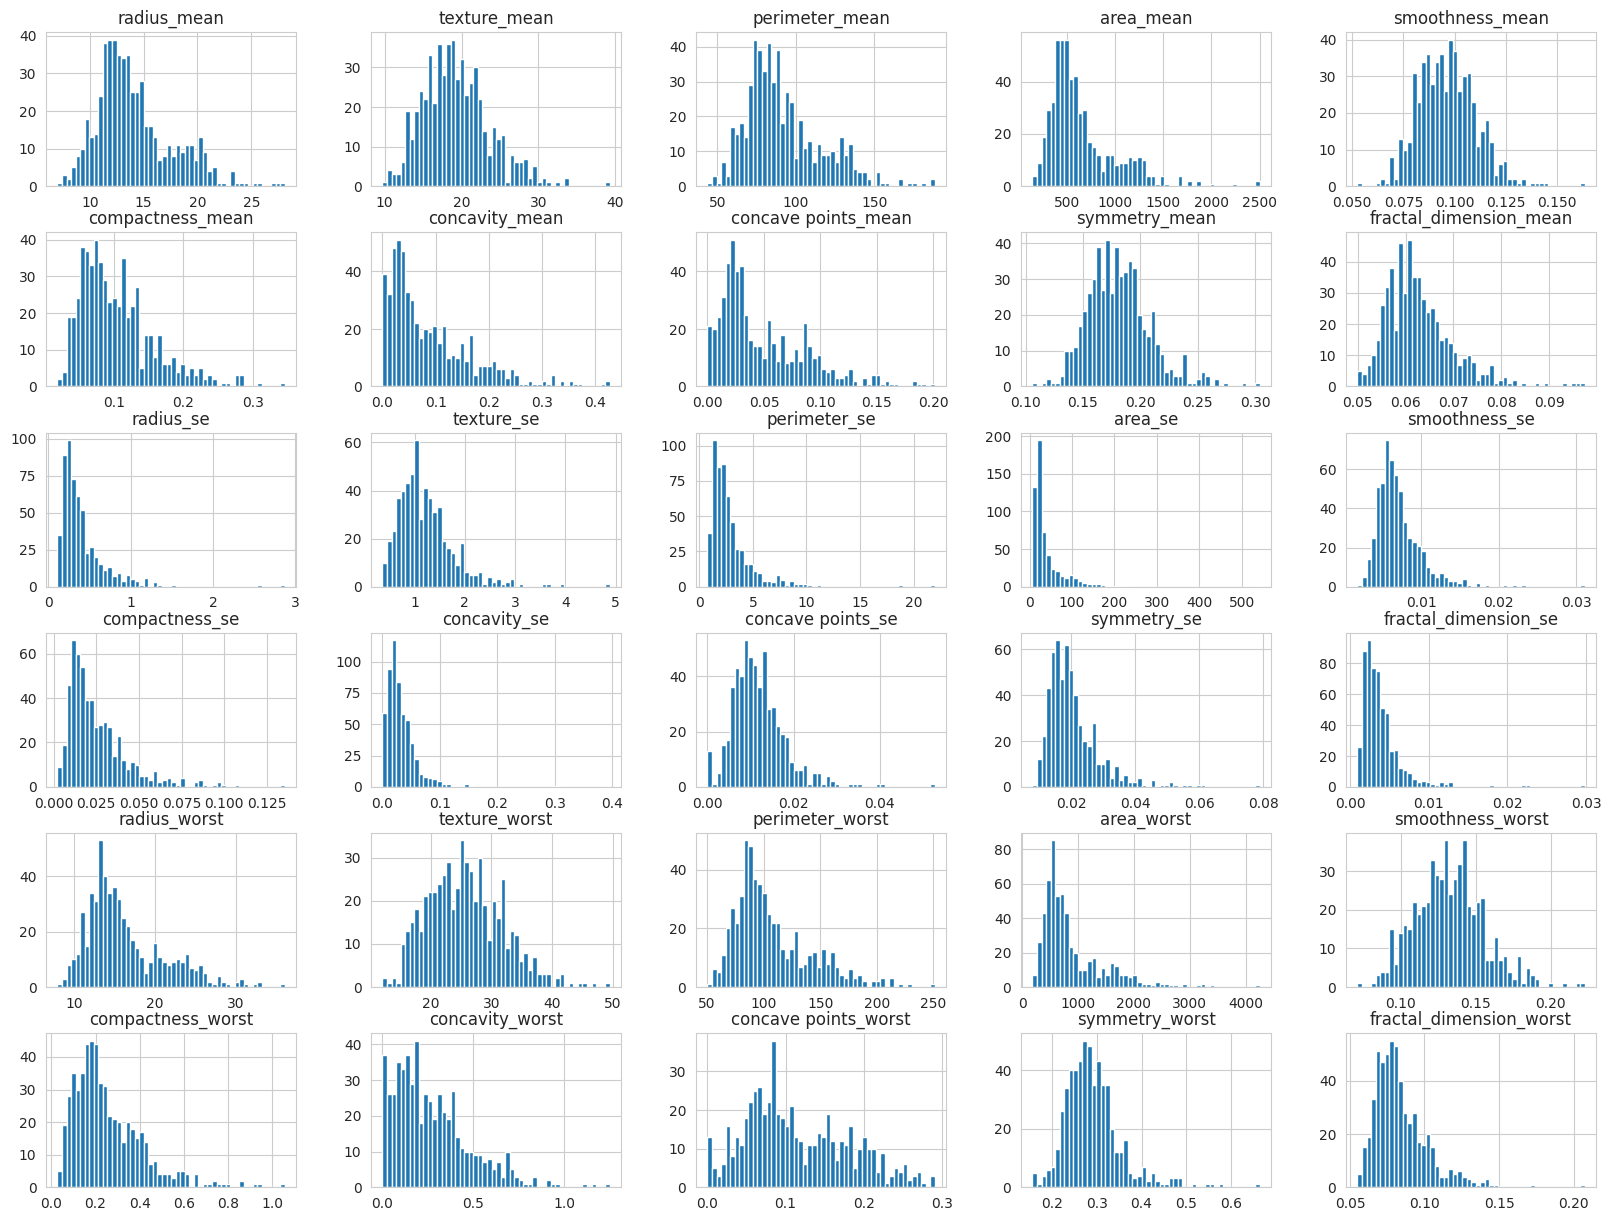

In [ ]:
%matplotlib inline
x.hist(bins=50, figsize=(20,15))

O grafico acima nos ajuda a entender a dimensão de cada coluna do nosso dataset e ter uma noção se temos colunas com variedade muito distinta. Podemos observar que a variedade das informações no eixo Y são altas, enquanto no eixo X não temos tanta diferença.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



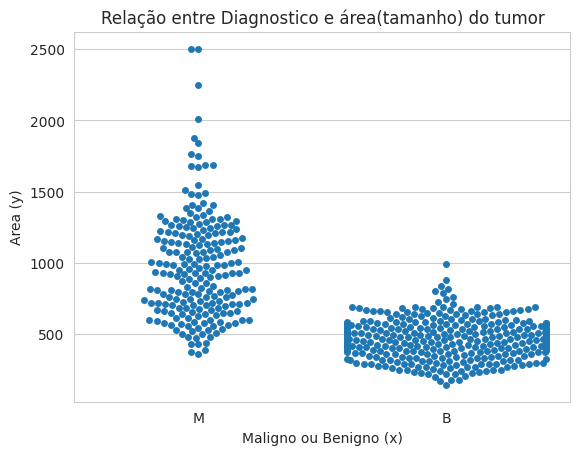

In [ ]:
sns.swarmplot( x= dataset['diagnosis'], y= dataset['area_mean'])
plt.xlabel('Maligno ou Benigno (x)')
plt.ylabel('Area (y)')
plt.title('Relação entre Diagnostico e área(tamanho) do tumor')
plt.show()

Com o gráfico acima, podemos observar que para tumores malignos, os dados se dispersam em uma area maior, representada pelo eixo y. Comparado ao tumores benignos, a area de concentração é maior.

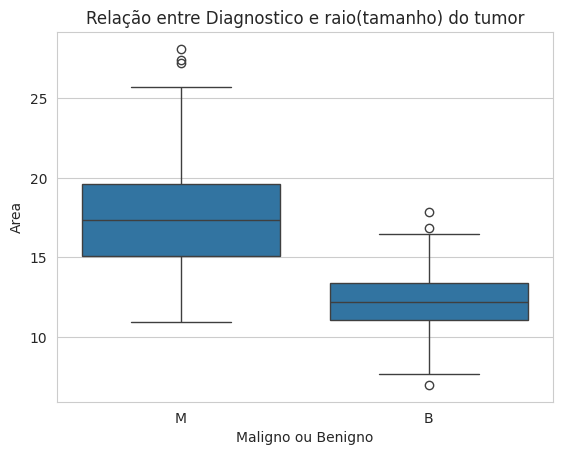

In [ ]:
sns.boxplot( x= dataset['diagnosis'], y= dataset['radius_mean'])
plt.xlabel('Maligno ou Benigno')
plt.ylabel('Area')
plt.title('Relação entre Diagnostico e raio(tamanho) do tumor')
plt.show()

Podemos observar que quanto menor o ráio maior a chance do tumos ser benigno

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



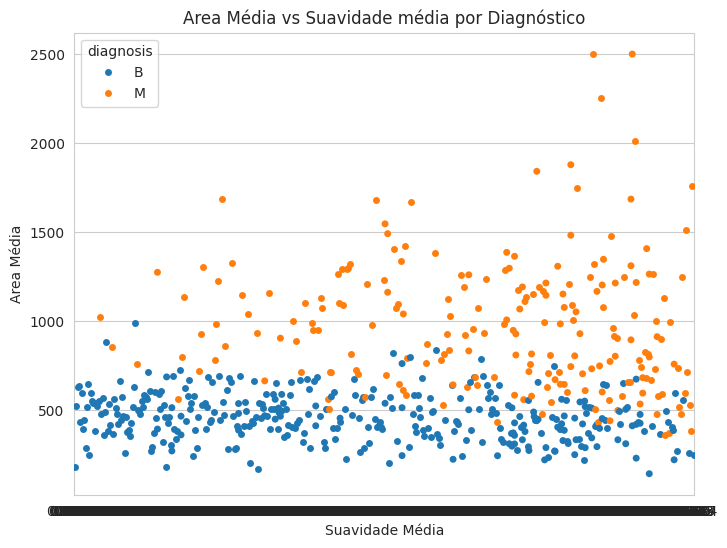

In [ ]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x='smoothness_mean', y='area_mean', hue='diagnosis', data=dataset)
plt.xlabel('Suavidade Média')
plt.ylabel('Area Média')
plt.title('Area Média vs Suavidade média por Diagnóstico')
plt.show()

Representado na imagem acima, relacionamos a questão de área do tumor com a suavidade média e comprovamos que em sua maioria, os com menor área são benignos, enquanto os maiores são malignos.

# Análise da Concavidade vs. Suavidade como Preditores de Malignidade

 Este gráfico de dispersão visualiza a relação entre a suavidade média (eixo X) e a concavidade média (eixo Y) das massas tumorais analisadas. Cada ponto no gráfico representa um único tumor, sendo colorido de verde se o diagnóstico for benigno ('B') e de vermelho se for maligno ('M').

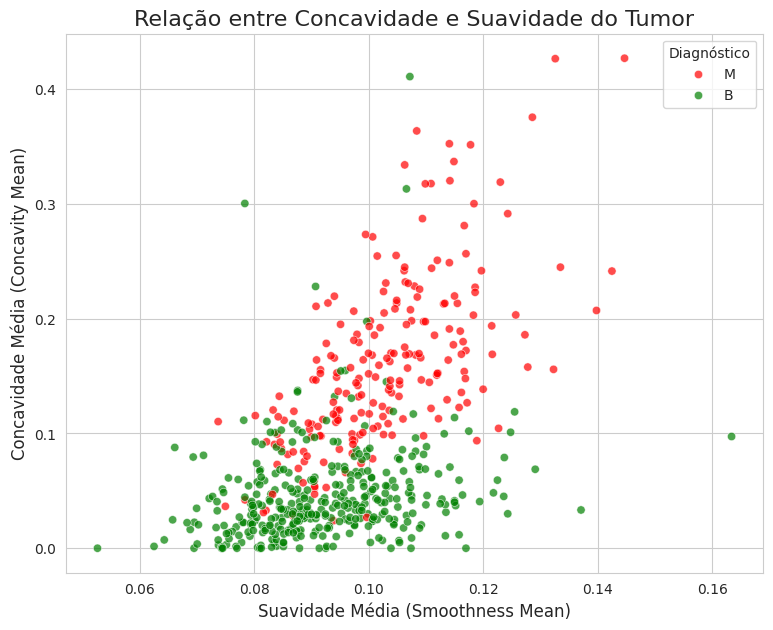

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(9, 7))
sns.scatterplot(data=dataset,
                x='smoothness_mean',
                y='concavity_mean',
                hue='diagnosis',
                palette={"M": "red", "B": "green"},
                alpha=0.7)

plt.title('Relação entre Concavidade e Suavidade do Tumor', fontsize=16)
plt.xlabel('Suavidade Média (Smoothness Mean)', fontsize=12)
plt.ylabel('Concavidade Média (Concavity Mean)', fontsize=12)
plt.legend(title='Diagnóstico')
plt.show()

 A principal observação é a nítida separação entre os dois grupos. Os tumores malignos (pontos vermelhos) tendem a se concentrar na região superior direita, indicando que, em geral, possuem valores mais altos tanto de concavidade quanto de suavidade. Em contraste, os tumores benignos (pontos verdes) agrupam-se na área inferior esquerda. Isso demonstra que a combinação dessas duas características é um forte indicador do diagnóstico.

# Matriz de Confusão - PCA + Regressão Logística

Relatório de Classificação:
              precision    recall  f1-score   support

     Benigno       0.99      0.99      0.99        71
     Maligno       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



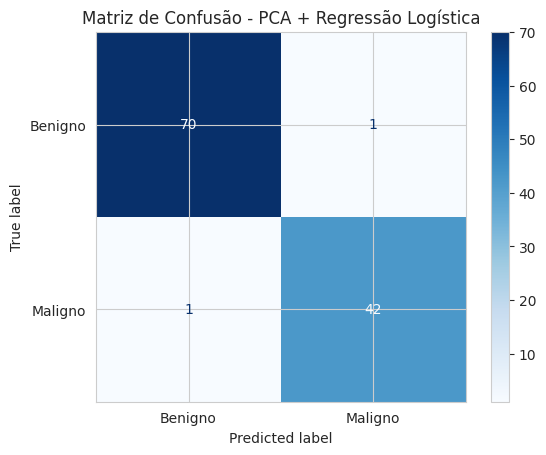

In [ ]:
dataset = dataset.drop(columns=['id', 'Unnamed: 32'], errors='ignore')
label_encoder = LabelEncoder()
dataset['diagnosis'] = label_encoder.fit_transform(dataset['diagnosis'])

X = dataset.drop(columns=['diagnosis'])
y = dataset['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=["Benigno", "Maligno"]))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benigno", "Maligno"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - PCA + Regressão Logística")
plt.show()

A ideia de usar PCA foi reduzir a quantidade de variáveis do dataset sem perder a informação mais importante. O dataset tem muitas variáveis numéricas, e isso pode deixar o modelo mais lento ou até mais confuso, dependendo do algoritmo.

Com o PCA, a gente resumiu essas 30 variáveis em apenas 5 componentes principais — ou seja, 5 combinações matemáticas que concentram a maior parte da variação dos dados. Isso ajuda a eliminar ruído, reduzir complexidade e tornar o modelo mais generalizável.

Depois disso, escolhemos a regressão logística como modelo preditivo porque ela é simples, rápida, e funciona muito bem para problemas de classificação binária — como é o caso aqui, entre benigno e maligno.

O resultado foi excelente: mesmo com apenas 5 componentes, o modelo alcançou 98% de acurácia e cometeu apenas 2 erros entre 114 casos. Isso mostra que a combinação de PCA + Regressão Logística foi uma escolha eficiente e precisa para esse tipo de dado.

# Random Forest

Neste bloco de código, utilizamos a validação cruzada para encontrar os melhores hiperparâmetros para o modelo Random Forest. Com os parâmetros ideais identificados, configuramos e treinamos o modelo.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(5, 20)
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=5
)

random_search.fit(x_train, y_train)
best_params = random_search.best_params_

print("Melhor Parâmetro:", best_params)

Melhor Parâmetro: {'max_depth': 10, 'n_estimators': 105}


Accuracy Score:  0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



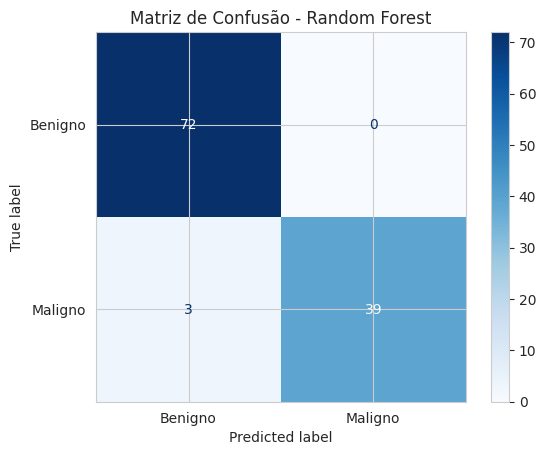

In [ ]:
rf = RandomForestClassifier(n_estimators=best_params["n_estimators"], max_depth=best_params["max_depth"], random_state=42)
rf.fit(x_train, y_train)

y_predito_random_forest = rf.predict(x_test)

print("Accuracy Score: ", accuracy_score(y_test, y_predito_random_forest))
print(classification_report(y_test, y_predito_random_forest))

cm = confusion_matrix(y_test, y_predito_random_forest)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benigno", "Maligno"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Random Forest")
plt.show()

A análise do modelo Random Forest demonstra um desempenho robusto na classificação. Observamos uma acurácia geral(97.37%). A capacidade de identificar tumores benignos foi excepcional, com 100% de recall para a classe "Benigno". Para a classe "Maligno", a precisão atingiu 100%, indicando que todas as previsões positivas foram corretas. Houve um pequeno número de falsos negativos (3 casos), onde tumores malignos foram classificados como benignos. Apesar disso, as métricas gerais, incluindo o F1-score, confirmam a alta eficácia do modelo para este conjunto de dados.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

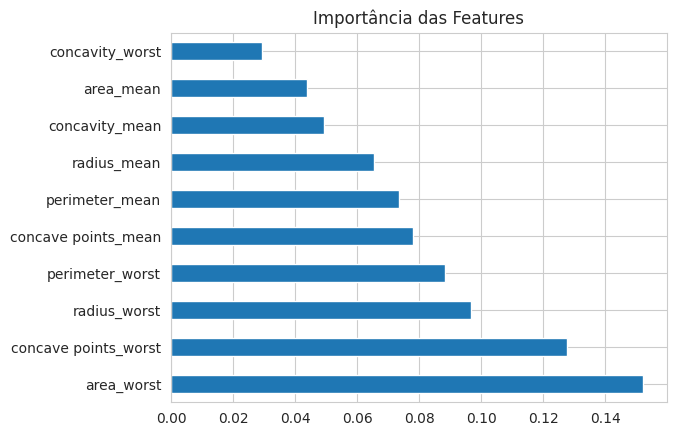

In [ ]:
importance = pd.Series(rf.feature_importances_, index=x_train.columns)
importance.nlargest(10).plot(kind="barh")
plt.title("Importância das Features")
plt.show()

O gráfico de importância das features mostra as 10 características mais relevantes para o modelo Random Forest na classificação do tumor de cancêr de mama. Observamos que 'perimeter_worst' é a feature com maior impacto, mas a decisão do algoritmo é baseada em uma combinação de várias features importantes, em vez de uma única super-feature. Isso sugere que a malignidade ou benignidade do câncer é influenciada por múltiplos fatores, conforme capturado pelo modelo.

# KNN

<Axes: >

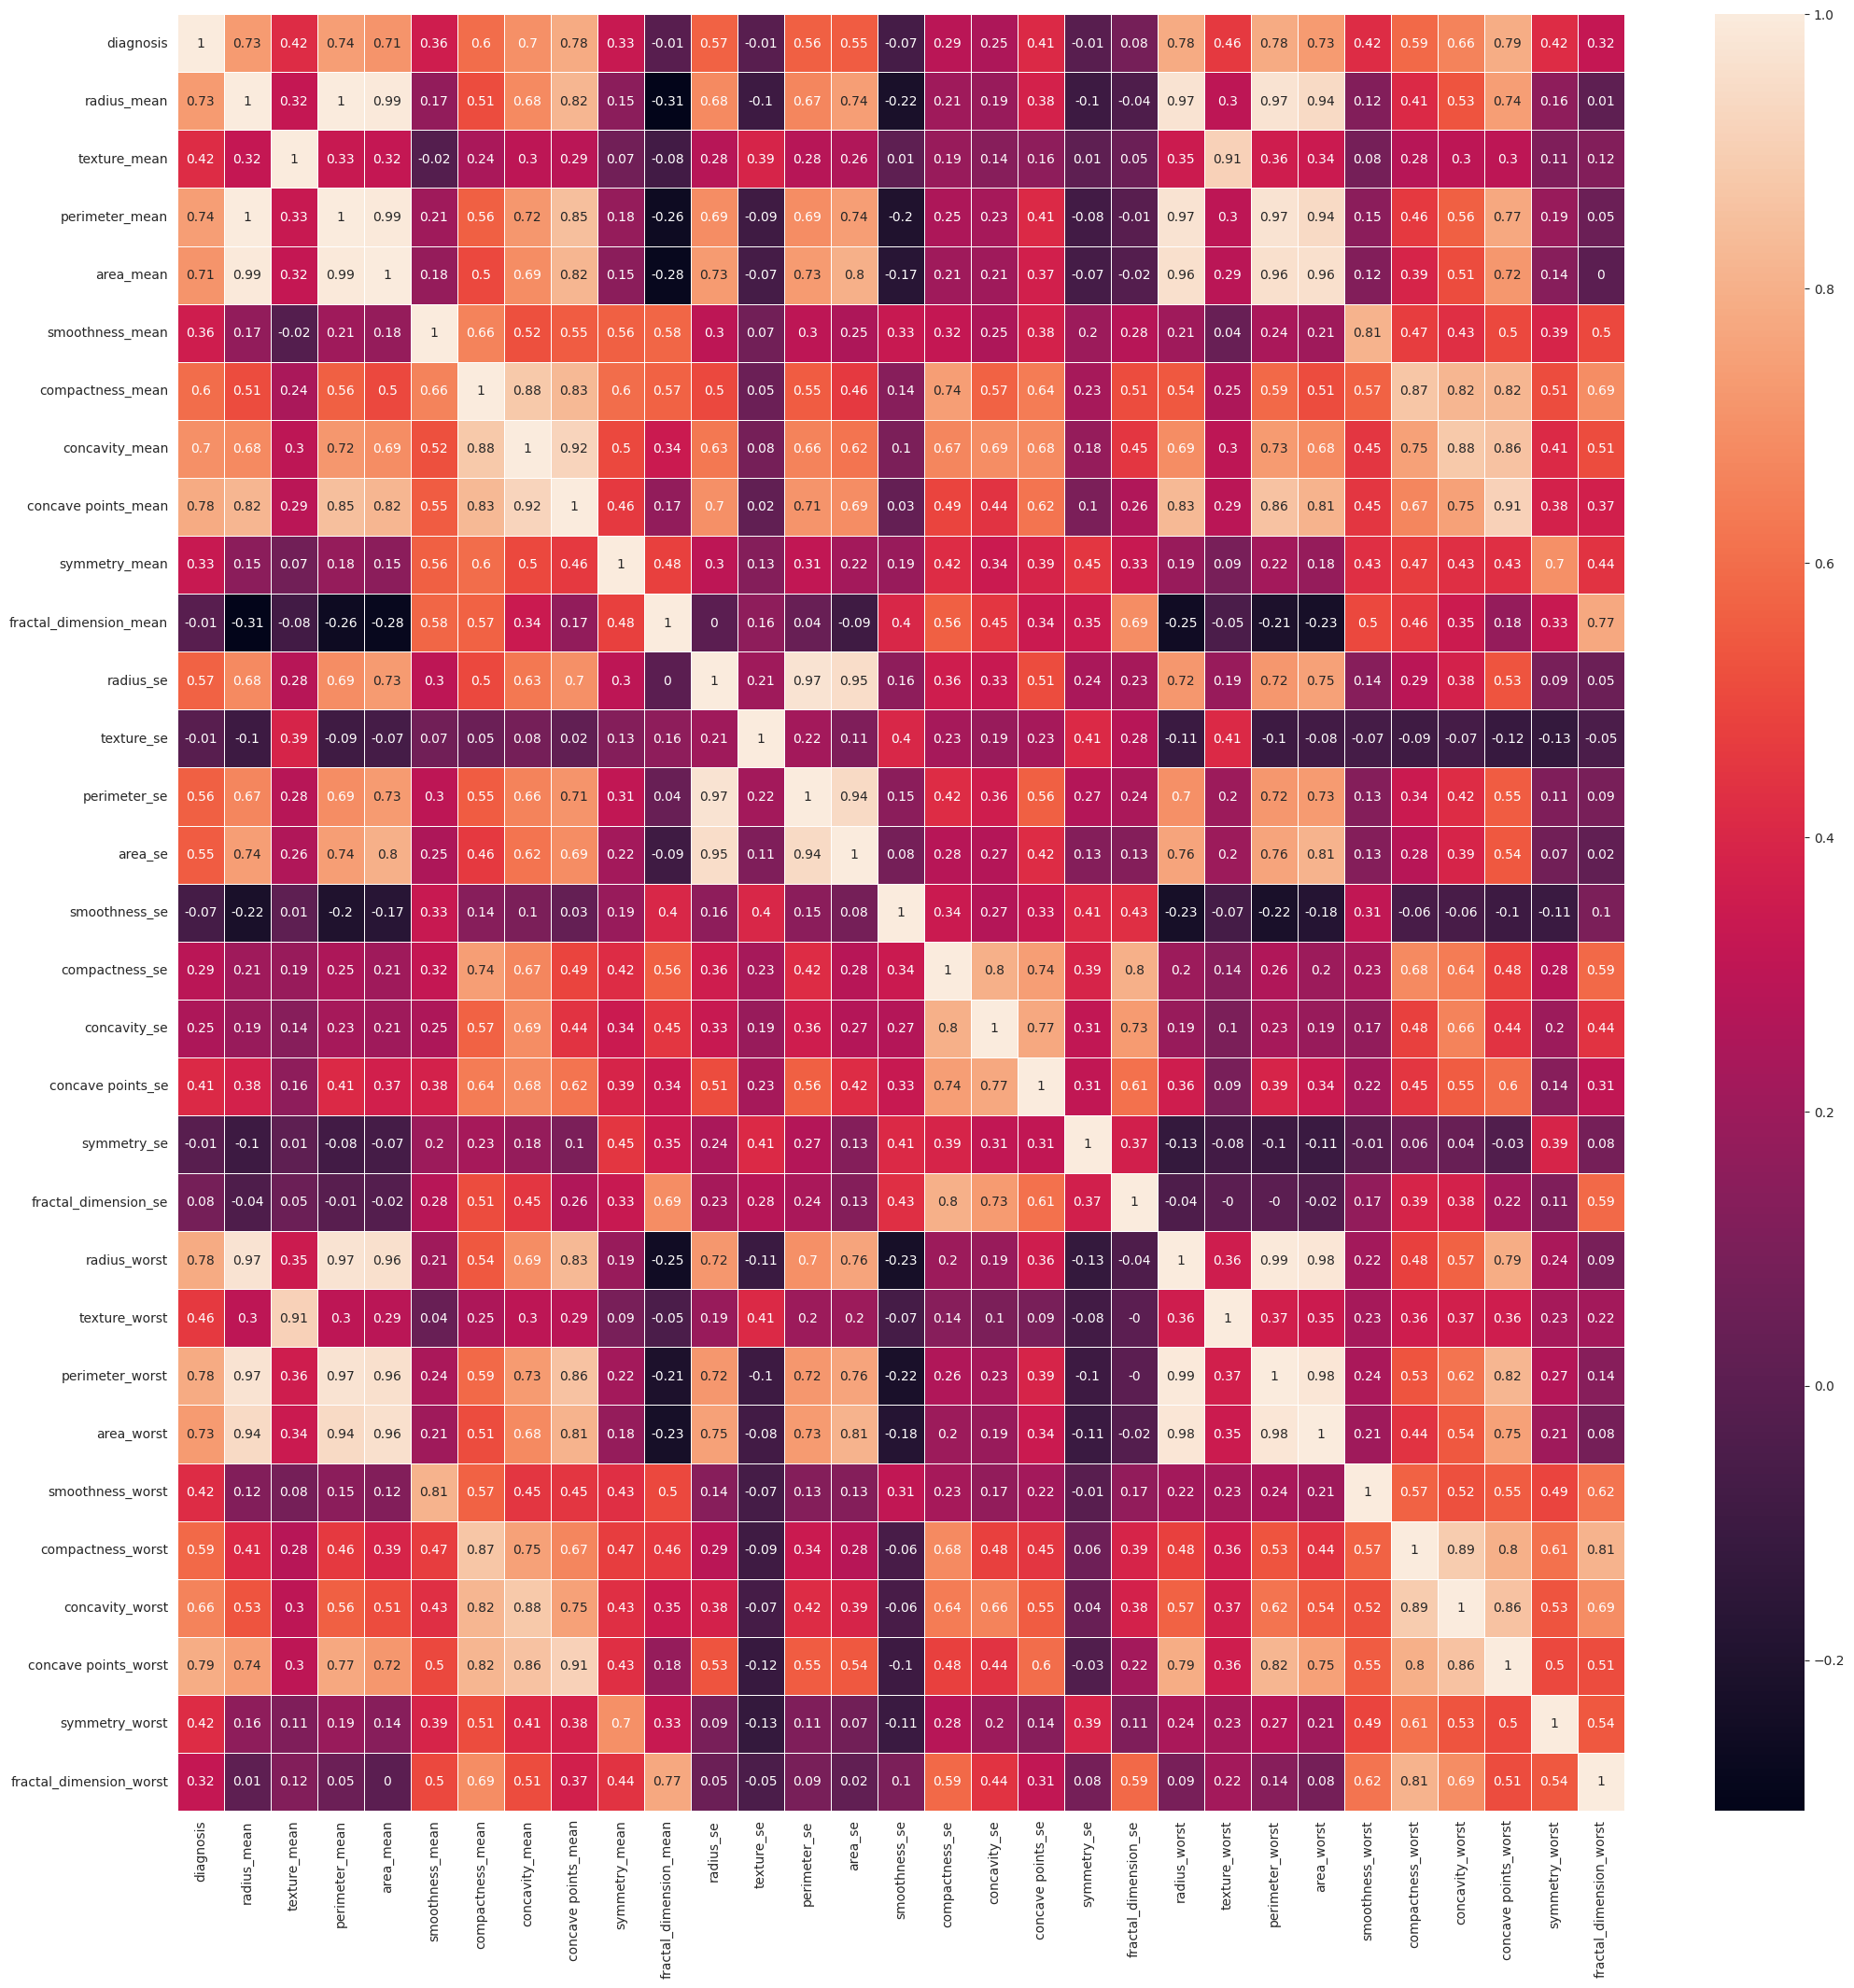

In [ ]:
correlation_matrix = dataset.corr().round(2)

fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=7)


x_train.shape

(455, 30)

In [ ]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)


...

Text(0, 0.5, 'Mean Error')

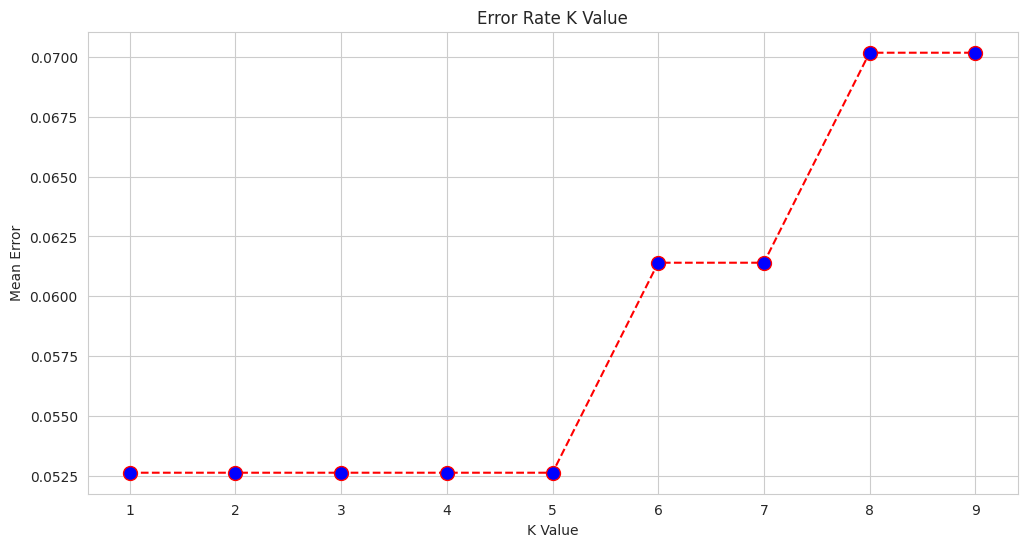

In [ ]:
error = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_escalonado, y_train)
    pred_i = knn.predict(x_test_escalonado)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
modelo_classificador = KNeighborsClassifier(n_neighbors=5)

modelo_classificador.fit(x_train_escalonado, y_train)

KNeighborsClassifier()

Realizando o fit com KNN.

In [ ]:
y_predito = modelo_classificador.predict(x_test_escalonado)
y_predito

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0])

In [ ]:
print(accuracy_score(y_test, y_predito)*100)

94.73684210526315


**Conclusão**

Decidimos usar o KNN como um dos modelos de analise, devido a sua simplicidade e lógica intuitiva. Como esse modelo é sensivel ao feature scale, realizar uma boa padronização das colunas é essencial para um resultado acertivo. Alem disso, como o KNN realiza a previsão baseado na distancia entre os "K" vizinhos, e a nossa base não possui uma quantidade de registros muito grandes, ele se tornou um modelo agil para esse caso.

Baseado nisso, conseguimos realizar uma predição com uma acertividade alta (94.73%).

# Conclusões finais

Com base nas análises e nos modelos de classificação aplicados (PCA + Regressão Logística e Random Forest), podemos concluir que apesar do valores elevados nas acertividades decorrente do tamanho da base, temos que:

1. **Análise Exploratória:** As visualizações iniciais, especialmente a relação entre a área/raio e o diagnóstico, e a análise da suavidade versus concavidade, demonstraram que as características morfológicas dos tumores são fortes preditores de malignidade. Tumores maiores e com maior concavidade/suavidade média tendem a ser malignos.

2. **PCA + Regressão Logística:** A aplicação de PCA para redução de dimensionalidade se mostrou eficaz. Mesmo com apenas 5 componentes principais, que se mostrou o ideal de acordo com o modelo, a Regressão Logística alcançou uma alta acurácia (98%), com poucos erros na classificação, validando a capacidade do PCA em preservar a informação relevante para a classificação.

3. **Random Forest:** O modelo Random Forest, ajustado com os melhores hiperparâmetros encontrados via busca aleatória, também apresentou um desempenho excelente (97.37% de precisão). A matriz de confusão confirmou a alta precisão do modelo em identificar corretamente tanto tumores benignos quanto malignos.

4. **KNN (K-Nearest Neighbors) :** A aplicação do KNN, com o valor de K adequado (5), apresentou uma acertividade muito boa também (94.73%), com alguns erros na classificação, validando a usabilidade do modelo KNN.

Em resumo, todos os modelos performaram resultados promissores para a classificação de tumores com base neste dataset. A combinação de técnicas de pré-processamento (como a padronização e PCA) com algoritmos de classificação robustos (como Regressão Logística, Random Forest e KNN) permitiu construir modelos preditivos com alta acurácia, o que é crucial para a detecção e diagnóstico de câncer.